In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
receiptsdf = pd.read_json("/content/receipts.json", lines=True)

In [3]:
receiptsdf

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [6]:
receiptsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

In [7]:
receiptsdf.describe()

,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent
count,544.000000,609.000000,635.00000,684.000000
mean,238.893382,585.962890,14.75748,77.796857
std,299.091731,1357.166947,61.13424,347.110349
min,5.000000,0.000000,0.00000,0.000000
25%,5.000000,5.000000,1.00000,1.000000
50%,45.000000,150.000000,2.00000,18.200000
75%,500.000000,750.000000,5.00000,34.960000
max,750.000000,10199.800000,689.00000,4721.950000


**Handling Missing Values**

In [12]:
missing_values = receiptsdf.isnull().sum()
missing_values

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [13]:
missing_values_percent = missing_values * 100 / len(receiptsdf)
print(missing_values_percent)

_id                         0.000000
bonusPointsEarned          51.385165
bonusPointsEarnedReason    51.385165
createDate                  0.000000
dateScanned                 0.000000
finishedDate               49.240393
modifyDate                  0.000000
pointsAwardedDate          52.010724
pointsEarned               45.576408
purchaseDate               40.035746
purchasedItemCount         43.252904
rewardsReceiptItemList     39.320822
rewardsReceiptStatus        0.000000
totalSpent                 38.873995
userId                      0.000000
dtype: float64


The significant percentage of null values in key fields such as finishedDate, purchaseDate, totalSpent, and purchasedItemCount raises serious concerns about the dataset's consistency and completeness.

The missing values in these fields present several issues:

Finished Date: Nearly 49% of receipts lack a finishedDate, which makes it challenging to determine when these receipts become invalid. This date is assumed to indicate when a receipt completes processing and thus becomes invalid.

Purchase Date: Over 40% of entries are missing the purchaseDate, complicating any analysis of actual purchase behavior over time. This data is crucial for understanding customer purchasing patterns.

Total Spent: About 39% of receipts lack information on totalSpent, significantly hindering financial analysis. This missing data affects calculations of the average spend per receipt or per user, which are essential for understanding consumer spending behavior.


Null values in columns like 'bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned', 'purchasedItemCount', and 'totalSpent' can greatly affect analyses concerning customer loyalty, purchasing behavior, and overall engagement.

It's essential to investigate discrepancies among related fields such as pointsEarned, bonusPointsEarned, and pointsAwarded_date to ensure data consistency and accurate reward point attribution.

In [14]:
receiptsdf['pointsEarned'].unique()

array([5.00000e+02, 1.50000e+02, 5.00000e+00, 7.50000e+02, 2.50000e+02,
       1.00000e+02, 8.85000e+03, 3.00000e+02,         nan, 3.89200e+02,
       1.85000e+02, 3.50000e+01, 6.50000e+02, 5.50000e+01, 5.00000e+01,
       3.55000e+02, 6.00000e+02, 1.75000e+03, 3.50000e+02, 2.25000e+02,
       2.75000e+02, 2.50000e+01, 7.55000e+02, 1.80000e+03, 8.10000e+02,
       3.05000e+02, 9.44980e+03, 9.12000e+01, 8.25000e+02, 3.50600e+02,
       1.25000e+02, 7.93100e+02, 2.00000e+02, 3.25000e+03, 0.00000e+00,
       4.00500e+03, 2.00500e+03, 8.41200e+02, 5.75000e+03, 3.75000e+03,
       8.70000e+03, 7.60000e+02, 7.80000e+02, 9.20000e+03, 1.00500e+03,
       1.99960e+03, 1.89200e+02, 8.95000e+03, 8.85000e+02, 8.00000e+02,
       2.95000e+02, 6.82400e+02, 8.37400e+02, 2.37800e+02, 1.60000e+02,
       8.55700e+02, 6.05700e+02, 2.41670e+03, 1.80640e+03, 4.05700e+02,
       1.51690e+03, 1.65830e+03, 2.68580e+03, 8.79100e+02, 3.65940e+03,
       9.34400e+02, 8.77700e+02, 9.22100e+02, 1.54180e+03, 1.000

If we examine the unique values for 'pointsEarned', we notice the absence of a zero value. This indicates that points were indeed earned for certain receipts, but the data was not recorded, leading to a substantial number of missing entries. The 'purchasedItemCount' column also has numerous missing values, complicating the assessment of eligibility for special offers or bonus points that require the purchase of specific quantities of products or brands. Moreover, the missing data in 'totalSpent' and 'rewardsReceiptItemList' fields naturally results in the absence of information about the points earned (reflected in the 'pointsEarned' field) for those transactions.

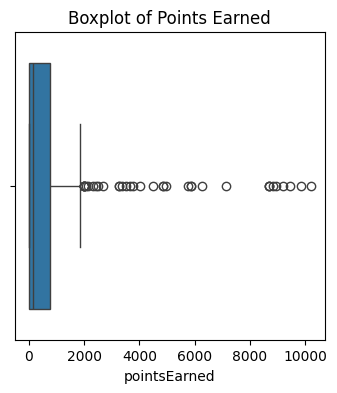

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
sns.boxplot(x=receiptsdf["pointsEarned"])
plt.title("Boxplot of Points Earned")
plt.show()